In [1]:
 # Importing Libraries
import numpy as np                    
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import re
import string

In [2]:
Book=pd.read_csv("C:\\Users\\HP\\Desktop\\The_Alchemist.txt",error_bad_lines=False)
Book

C:\Users\HP\AppData\Local\Temp\ipykernel_12748\784086747.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Book=pd.read_csv("C:\\Users\\HP\\Desktop\\The_Alchemist.txt",error_bad_lines=False)
b'Skipping line 19: expected 1 fields, saw 2\nSkipping line 32: expected 1 fields, saw 4\nSkipping line 33: expected 1 fields, saw 2\nSkipping line 36: expected 1 fields, saw 3\nSkipping line 37: expected 1 fields, saw 4\nSkipping line 39: expected 1 fields, saw 2\nSkipping line 40: expected 1 fields, saw 2\nSkipping line 42: expected 1 fields, saw 2\nSkipping line 44: expected 1 fields, saw 2\nSkipping line 45: expected 1 fields, saw 2\nSkipping line 47: expected 1 fields, saw 2\nSkipping line 48: expected 1 fields, saw 2\nSkipping line 49: expected 1 fields, saw 2\nSkipping line 51: expected 1 fields, saw 3\nSkipping line 56: expected 1 fields, saw 3\nSkipping line 57: expected 1 fields, saw 3\nSkippi

,THE
0,ALCHEMIST
1,PAULO COELHO
2,TRANSLATED BY ALAN R. CLARKE
3,Contents
4,INTRODUCTION
...,...
1866,The Valkyries: An Encounter with Angels
1867,By the River Piedra I Sat Down and Wept
1868,The Fifth Mountain
1869,The Illustrated Alchemist


In [3]:
# Changing the column name
Book.columns = ['Observations']    
Book

,Observations
0,ALCHEMIST
1,PAULO COELHO
2,TRANSLATED BY ALAN R. CLARKE
3,Contents
4,INTRODUCTION
...,...
1866,The Valkyries: An Encounter with Angels
1867,By the River Piedra I Sat Down and Wept
1868,The Fifth Mountain
1869,The Illustrated Alchemist


In [4]:
Book_Observations = ' '.join(Book)
Book_Observations

'Observations'

In [5]:
Book.shape

(1871, 1)

In [6]:
Book.head()

,Observations
0,ALCHEMIST
1,PAULO COELHO
2,TRANSLATED BY ALAN R. CLARKE
3,Contents
4,INTRODUCTION


In [7]:
Book.isnull().sum()

Observations    0
dtype: int64

In [8]:
Book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Observations  1871 non-null   object
dtypes: object(1)
memory usage: 14.7+ KB


In [9]:
Book.columns.values

array(['Observations'], dtype=object)

# Text Preprocessing

In [10]:
Book = [Observations.strip() for Observations in Book.Observations]  ## Remove both the leading and the trailing characters
Book = [Observations for Observations in Book if Observations]   ## Removes empty strings, because they are considered in Python as False
Book[0:10]

['ALCHEMIST',
 'PAULO COELHO',
 'TRANSLATED BY ALAN R. CLARKE',
 'Contents',
 'INTRODUCTION',
 'I remember receiving a letter from the',
 'American publisher Harper Collins…',
 'PROLOGUE',
 'The alchemist picked up a book that someone',
 'in the…']

In [11]:
# Joining the list into one string/text
Book_observations = ' '.join(Book)    
Book_observations

'ALCHEMIST PAULO COELHO TRANSLATED BY ALAN R. CLARKE Contents INTRODUCTION I remember receiving a letter from the American publisher Harper Collins… PROLOGUE The alchemist picked up a book that someone in the… ONE The boy’s name was Santiago. Dusk was falling as the… TWO The boy had been working for the crystal merchant for… EPILOGUE church just as night… ABOUT THE AUTHOR INTERNATIONAL ACCLAIM BOOKS BY PAULO COELHO CREDITS COVER COPYRIGHT ABOUT THE PUBLISHER TEN YEARS ON I REMEMBER RECEIVING A LETTER FROM THE AMERICAN publisher Harper Collins that said that: “reading The Alchemist was like getting up at dawn and seeing the sun rise while the rest of the world still slept.” I struggling to establish myself as a writer and to follow my path despite all the voices telling me it was impossible. Brazilian journalist phoned to say that President Clinton had been Roberts declaring that she adored the book. Walking alone down a The Alchemist!” What’s the secret behind such a huge success? that

In [12]:
# Tokenization
from nltk.tokenize import TweetTokenizer    
tknzr = TweetTokenizer(strip_handles = True)
Book_observations = tknzr.tokenize(Book_observations)
print(Book_observations)

['ALCHEMIST', 'PAULO', 'COELHO', 'TRANSLATED', 'BY', 'ALAN', 'R', '.', 'CLARKE', 'Contents', 'INTRODUCTION', 'I', 'remember', 'receiving', 'a', 'letter', 'from', 'the', 'American', 'publisher', 'Harper', 'Collins', '…', 'PROLOGUE', 'The', 'alchemist', 'picked', 'up', 'a', 'book', 'that', 'someone', 'in', 'the', '…', 'ONE', 'The', 'boy', '’', 's', 'name', 'was', 'Santiago', '.', 'Dusk', 'was', 'falling', 'as', 'the', '…', 'TWO', 'The', 'boy', 'had', 'been', 'working', 'for', 'the', 'crystal', 'merchant', 'for', '…', 'EPILOGUE', 'church', 'just', 'as', 'night', '…', 'ABOUT', 'THE', 'AUTHOR', 'INTERNATIONAL', 'ACCLAIM', 'BOOKS', 'BY', 'PAULO', 'COELHO', 'CREDITS', 'COVER', 'COPYRIGHT', 'ABOUT', 'THE', 'PUBLISHER', 'TEN', 'YEARS', 'ON', 'I', 'REMEMBER', 'RECEIVING', 'A', 'LETTER', 'FROM', 'THE', 'AMERICAN', 'publisher', 'Harper', 'Collins', 'that', 'said', 'that', ':', '“', 'reading', 'The', 'Alchemist', 'was', 'like', 'getting', 'up', 'at', 'dawn', 'and', 'seeing', 'the', 'sun', 'rise', '

In [13]:
# Again Joining the list into one string/text
Book_observations_text=' '.join(Book_observations)  
Book_observations_text

'ALCHEMIST PAULO COELHO TRANSLATED BY ALAN R . CLARKE Contents INTRODUCTION I remember receiving a letter from the American publisher Harper Collins … PROLOGUE The alchemist picked up a book that someone in the … ONE The boy ’ s name was Santiago . Dusk was falling as the … TWO The boy had been working for the crystal merchant for … EPILOGUE church just as night … ABOUT THE AUTHOR INTERNATIONAL ACCLAIM BOOKS BY PAULO COELHO CREDITS COVER COPYRIGHT ABOUT THE PUBLISHER TEN YEARS ON I REMEMBER RECEIVING A LETTER FROM THE AMERICAN publisher Harper Collins that said that : “ reading The Alchemist was like getting up at dawn and seeing the sun rise while the rest of the world still slept . ” I struggling to establish myself as a writer and to follow my path despite all the voices telling me it was impossible . Brazilian journalist phoned to say that President Clinton had been Roberts declaring that she adored the book . Walking alone down a The Alchemist ! ” What ’ s the secret behind such a

In [14]:
# Remove Punctuations 
no_punc_text = Book_observations_text.translate(str.maketrans('','',string.punctuation))  
no_punc_text

'ALCHEMIST PAULO COELHO TRANSLATED BY ALAN R  CLARKE Contents INTRODUCTION I remember receiving a letter from the American publisher Harper Collins … PROLOGUE The alchemist picked up a book that someone in the … ONE The boy ’ s name was Santiago  Dusk was falling as the … TWO The boy had been working for the crystal merchant for … EPILOGUE church just as night … ABOUT THE AUTHOR INTERNATIONAL ACCLAIM BOOKS BY PAULO COELHO CREDITS COVER COPYRIGHT ABOUT THE PUBLISHER TEN YEARS ON I REMEMBER RECEIVING A LETTER FROM THE AMERICAN publisher Harper Collins that said that  “ reading The Alchemist was like getting up at dawn and seeing the sun rise while the rest of the world still slept  ” I struggling to establish myself as a writer and to follow my path despite all the voices telling me it was impossible  Brazilian journalist phoned to say that President Clinton had been Roberts declaring that she adored the book  Walking alone down a The Alchemist  ” What ’ s the secret behind such a huge s

In [15]:
# Remove https or url within text
no_url_text = re.sub(r'http\S+', '', no_punc_text)    
no_url_text

'ALCHEMIST PAULO COELHO TRANSLATED BY ALAN R  CLARKE Contents INTRODUCTION I remember receiving a letter from the American publisher Harper Collins … PROLOGUE The alchemist picked up a book that someone in the … ONE The boy ’ s name was Santiago  Dusk was falling as the … TWO The boy had been working for the crystal merchant for … EPILOGUE church just as night … ABOUT THE AUTHOR INTERNATIONAL ACCLAIM BOOKS BY PAULO COELHO CREDITS COVER COPYRIGHT ABOUT THE PUBLISHER TEN YEARS ON I REMEMBER RECEIVING A LETTER FROM THE AMERICAN publisher Harper Collins that said that  “ reading The Alchemist was like getting up at dawn and seeing the sun rise while the rest of the world still slept  ” I struggling to establish myself as a writer and to follow my path despite all the voices telling me it was impossible  Brazilian journalist phoned to say that President Clinton had been Roberts declaring that she adored the book  Walking alone down a The Alchemist  ” What ’ s the secret behind such a huge s

In [16]:
# Tokenization
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['ALCHEMIST', 'PAULO', 'COELHO', 'TRANSLATED', 'BY', 'ALAN', 'R', 'CLARKE', 'Contents', 'INTRODUCTION', 'I', 'remember', 'receiving', 'a', 'letter', 'from', 'the', 'American', 'publisher', 'Harper', 'Collins', '…', 'PROLOGUE', 'The', 'alchemist', 'picked', 'up', 'a', 'book', 'that', 'someone', 'in', 'the', '…', 'ONE', 'The', 'boy', '’', 's', 'name', 'was', 'Santiago', 'Dusk', 'was', 'falling', 'as', 'the', '…', 'TWO', 'The', 'boy', 'had', 'been', 'working', 'for', 'the', 'crystal', 'merchant', 'for', '…', 'EPILOGUE', 'church', 'just', 'as', 'night', '…', 'ABOUT', 'THE', 'AUTHOR', 'INTERNATIONAL', 'ACCLAIM', 'BOOKS', 'BY', 'PAULO', 'COELHO', 'CREDITS', 'COVER', 'COPYRIGHT', 'ABOUT', 'THE', 'PUBLISHER', 'TEN', 'YEARS', 'ON', 'I', 'REMEMBER', 'RECEIVING', 'A', 'LETTER', 'FROM', 'THE', 'AMERICAN', 'publisher', 'Harper', 'Collins', 'that', 'said', 'that', '“', 'reading', 'The', 'Alchemist', 'was', 'like', 'getting', 'up', 'at', 'dawn', 'and', 'seeing', 'the', 'sun', 'rise', 'while', 'the', 

In [18]:
# Tokens count
len(text_tokens)

18166

In [19]:
# Remove Stopwords

my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['ALCHEMIST', 'PAULO', 'COELHO', 'TRANSLATED', 'BY', 'ALAN', 'R', 'CLARKE', 'Contents', 'INTRODUCTION', 'remember', 'receiving', 'letter', 'American', 'publisher', 'Harper', 'Collins', '…', 'PROLOGUE', 'The', 'alchemist', 'picked', 'book', 'someone', '…', 'ONE', 'The', 'boy', '’', 'name', 'Santiago', 'Dusk', 'falling', '…', 'TWO', 'The', 'boy', 'working', 'crystal', 'merchant', '…', 'EPILOGUE', 'church', 'night', '…', 'ABOUT', 'THE', 'AUTHOR', 'INTERNATIONAL', 'ACCLAIM', 'BOOKS', 'BY', 'PAULO', 'COELHO', 'CREDITS', 'COVER', 'COPYRIGHT', 'ABOUT', 'THE', 'PUBLISHER', 'TEN', 'YEARS', 'ON', 'REMEMBER', 'RECEIVING', 'A', 'LETTER', 'FROM', 'THE', 'AMERICAN', 'publisher', 'Harper', 'Collins', 'said', '“', 'reading', 'The', 'Alchemist', 'like', 'getting', 'dawn', 'seeing', 'sun', 'rise', 'rest', 'world', 'still', 'slept', '”', 'struggling', 'establish', 'writer', 'follow', 'path', 'despite', 'voices', 'telling', 'impossible', 'Brazilian', 'journalist', 'phoned', 'say', 'President', 'Clinton', 

In [20]:
# Normalize the data
lower_words = [Text.lower() for Text in no_stop_tokens]   
print(lower_words[100:200])

['phoned', 'say', 'president', 'clinton', 'roberts', 'declaring', 'adored', 'book', 'walking', 'alone', 'the', 'alchemist', '”', 'what', '’', 'secret', 'behind', 'huge', 'success', 'god', 'chose', 'earth', 'whenever', 'something', '’', 'courage', 'confront', 'dream', 'why', 'there', 'four', 'obstacles', 'first', 'told', 'childhood', 'onward', 'everything', 'want', 'impossible', 'we', 'grow', 'calling', 'deeply', 'buried', 'soul', 'invisible', 'but', '’', 'still', 'afraid', 'hurting', 'around', 'us', 'abandoning', 'everything', 'order', 'pursue', 'dream', 'we', 'realize', 'love', 'we', 'realize', 'genuinely', 'wish', 'us', 'well', 'want', 'us', 'happy', 'prepared', 'accompany', 'us', 'journey', 'third', 'obstacle', 'fear', 'defeats', 'meet', '’', 'really', 'want', 'anyway', '”', 'we', 'want', 'know', 'staked', 'everything', 'path', 'personal', 'calling', 'patience', 'difficult', 'times', 'know', 'universe', 'ask', 'defeats', 'necessary']


In [21]:
# Stemming (Optional)
from nltk.stem import PorterStemmer    
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['phone', 'say', 'presid', 'clinton', 'robert', 'declar', 'ador', 'book', 'walk', 'alon', 'the', 'alchemist', '”', 'what', '’', 'secret', 'behind', 'huge', 'success', 'god', 'chose', 'earth', 'whenev', 'someth', '’', 'courag', 'confront', 'dream', 'whi', 'there', 'four', 'obstacl', 'first', 'told', 'childhood', 'onward', 'everyth', 'want', 'imposs', 'we', 'grow', 'call', 'deepli', 'buri', 'soul', 'invis', 'but', '’', 'still', 'afraid', 'hurt', 'around', 'us', 'abandon', 'everyth', 'order', 'pursu', 'dream', 'we', 'realiz', 'love', 'we', 'realiz', 'genuin', 'wish', 'us', 'well', 'want', 'us', 'happi', 'prepar', 'accompani', 'us', 'journey', 'third', 'obstacl', 'fear', 'defeat', 'meet', '’', 'realli', 'want', 'anyway', '”', 'we', 'want', 'know', 'stake', 'everyth', 'path', 'person', 'call', 'patienc', 'difficult', 'time', 'know', 'univers', 'ask', 'defeat', 'necessari']


In [22]:
# Lemmatization
nlp = spacy.load('en_core_web_sm')   
doc = nlp(' '.join(lower_words))
print(doc)

alchemist paulo coelho translated by alan r clarke contents introduction remember receiving letter american publisher harper collins … prologue the alchemist picked book someone … one the boy ’ name santiago dusk falling … two the boy working crystal merchant … epilogue church night … about the author international acclaim books by paulo coelho credits cover copyright about the publisher ten years on remember receiving a letter from the american publisher harper collins said “ reading the alchemist like getting dawn seeing sun rise rest world still slept ” struggling establish writer follow path despite voices telling impossible brazilian journalist phoned say president clinton roberts declaring adored book walking alone the alchemist ” what ’ secret behind huge success god chose earth whenever something ’ courage confront dream why there four obstacles first told childhood onward everything want impossible we grow calling deeply buried soul invisible but ’ still afraid hurting around 

In [23]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['alchemist', 'paulo', 'coelho', 'translate', 'by', 'alan', 'r', 'clarke', 'content', 'introduction', 'remember', 'receive', 'letter', 'american', 'publisher', 'harper', 'collin', '…', 'prologue', 'the', 'alchemist', 'pick', 'book', 'someone', '…', 'one', 'the', 'boy', "'", 'name', 'santiago', 'dusk', 'fall', '…', 'two', 'the', 'boy', 'work', 'crystal', 'merchant', '…', 'epilogue', 'church', 'night', '…', 'about', 'the', 'author', 'international', 'acclaim', 'book', 'by', 'paulo', 'coelho', 'credit', 'cover', 'copyright', 'about', 'the', 'publisher', 'ten', 'year', 'on', 'remember', 'receive', 'a', 'letter', 'from', 'the', 'american', 'publisher', 'harper', 'collin', 'say', '"', 'read', 'the', 'alchemist', 'like', 'get', 'dawn', 'see', 'sun', 'rise', 'rest', 'world', 'still', 'sleep', '"', 'struggle', 'establish', 'writer', 'follow', 'path', 'despite', 'voice', 'tell', 'impossible', 'brazilian', 'journalist', 'phone', 'say', 'president', 'clinton', 'roberts', 'declare', 'adore', 'book'

In [24]:
clean_Book = ' '.join(lemmas)
clean_Book

'alchemist paulo coelho translate by alan r clarke content introduction remember receive letter american publisher harper collin … prologue the alchemist pick book someone … one the boy \' name santiago dusk fall … two the boy work crystal merchant … epilogue church night … about the author international acclaim book by paulo coelho credit cover copyright about the publisher ten year on remember receive a letter from the american publisher harper collin say " read the alchemist like get dawn see sun rise rest world still sleep " struggle establish writer follow path despite voice tell impossible brazilian journalist phone say president clinton roberts declare adore book walk alone the alchemist " what \' secret behind huge success god choose earth whenever something \' courage confront dream why there four obstacle first tell childhood onward everything want impossible we grow call deeply bury soul invisible but \' still afraid hurt around we abandon everything order pursue dream we re

## Feature Extaction



### 1. Countervectorizer

In [25]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
Bookcv = cv.fit_transform(lemmas)

In [26]:
print(cv.vocabulary_)

{'alchemist': 43, 'paulo': 1140, 'coelho': 291, 'translate': 1647, 'by': 226, 'alan': 41, 'clarke': 277, 'content': 340, 'introduction': 844, 'remember': 1305, 'receive': 1279, 'letter': 912, 'american': 59, 'publisher': 1240, 'harper': 731, 'collin': 298, 'prologue': 1230, 'the': 1605, 'pick': 1163, 'book': 196, 'someone': 1469, 'one': 1097, 'boy': 201, 'name': 1041, 'santiago': 1367, 'dusk': 476, 'fall': 582, 'two': 1672, 'work': 1794, 'crystal': 371, 'merchant': 989, 'epilogue': 529, 'church': 273, 'night': 1059, 'about': 3, 'author': 124, 'international': 838, 'acclaim': 9, 'credit': 366, 'cover': 361, 'copyright': 347, 'ten': 1594, 'year': 1805, 'on': 1095, 'from': 657, 'say': 1373, 'read': 1269, 'like': 919, 'get': 679, 'dawn': 389, 'see': 1389, 'sun': 1548, 'rise': 1333, 'rest': 1319, 'world': 1795, 'still': 1516, 'sleep': 1453, 'struggle': 1532, 'establish': 536, 'writer': 1801, 'follow': 627, 'path': 1137, 'despite': 420, 'voice': 1723, 'tell': 1592, 'impossible': 801, 'brazil

In [27]:
print(cv.get_feature_names()[100:200])

['arrive', 'art', 'as', 'ashamed', 'aside', 'ask', 'asked', 'asleep', 'aspect', 'assume', 'astonish', 'astride', 'at', 'atmosphere', 'attach', 'attack', 'attempt', 'attend', 'attention', 'attentively', 'attract', 'attraction', 'aura', 'austin', 'author', 'avidly', 'avoid', 'await', 'awake', 'awaken', 'awakening', 'aware', 'away', 'awe', 'back', 'backyard', 'bad', 'bag', 'baker', 'bakery', 'balk', 'bar', 'barbarian', 'barely', 'base', 'basic', 'basically', 'battalion', 'battle', 'battlefield', 'be', 'bead', 'bear', 'beat', 'beautiful', 'beauty', 'because', 'become', 'becoming', 'bedouin', 'bedrock', 'before', 'beggar', 'begin', 'beginner', 'behave', 'behind', 'being', 'believably', 'believe', 'belonging', 'belt', 'bench', 'beneath', 'bergensavisen', 'beseech', 'beside', 'bet', 'betray', 'beyond', 'bind', 'bird', 'bit', 'bitter', 'bitterness', 'black', 'blade', 'blame', 'bleach', 'blessing', 'blind', 'blood', 'blot', 'blow', 'blue', 'body', 'book', 'booklist', 'boss', 'bottle']


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
print(Bookcv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
print(Bookcv.toarray().shape)

(9814, 1814)


###  2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [30]:
cv_ngram_range = CountVectorizer(analyzer = 'word', ngram_range = (1,3), max_features = 100)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas) 

In [31]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['able', 'alchemist', 'already', 'always', 'and', 'ask', 'back', 'become', 'begin', 'book', 'boy', 'but', 'come', 'could', 'crystal', 'day', 'desert', 'do', 'dream', 'englishman', 'even', 'every', 'everything', 'feel', 'find', 'follow', 'get', 'give', 'go', 'god', 'gold', 'he', 'heart', 'it', 'know', 'language', 'learn', 'leave', 'legend', 'life', 'like', 'live', 'long', 'look', 'love', 'make', 'man', 'many', 'merchant', 'need', 'never', 'oasis', 'old', 'omen', 'one', 'part', 'people', 'personal', 'place', 'read', 'realize', 'say', 'see', 'sheep', 'shepherd', 'shop', 'so', 'something', 'soul', 'speak', 'stone', 'story', 'take', 'tell', 'that', 'the', 'then', 'there', 'they', 'thing', 'think', 'time', 'treasure', 'try', 'turn', 'two', 'understand', 'want', 'way', 'we', 'well', 'what', 'why', 'wind', 'woman', 'word', 'world', 'would', 'year', 'you']
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 3. TF-IDF Vectorizer

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv_ngram_max_features = TfidfVectorizer(norm = 'l2', analyzer = 'word', ngram_range = (1,3), max_features = 500)
tfidf_matix_ngram = tfidfv_ngram_max_features.fit_transform(lemmas)

In [33]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['abandon', 'able', 'achieve', 'across', 'afraid', 'afternoon', 'ago', 'alchemist', 'alchemy', 'all', 'allow', 'almost', 'alone', 'along', 'already', 'also', 'always', 'among', 'an', 'and', 'animal', 'another', 'answer', 'anyone', 'anything', 'appear', 'approach', 'arab', 'arabic', 'arm', 'army', 'around', 'arrive', 'as', 'ask', 'attention', 'author', 'away', 'back', 'bad', 'bag', 'baker', 'bar', 'base', 'battle', 'be', 'beautiful', 'beauty', 'because', 'become', 'before', 'begin', 'beginner', 'behind', 'believe', 'bird', 'bit', 'black', 'blessing', 'blow', 'book', 'boy', 'bring', 'build', 'but', 'buy', 'by', 'call', 'camel', 'camp', 'capable', 'caravan', 'carry', 'center', 'certain', 'certainly', 'change', 'charge', 'chief', 'chieftain', 'child', 'church', 'city', 'climb', 'close', 'coelho', 'come', 'companion', 'concentrate', 'contemplate', 'continue', 'conversation', 'could', 'country', 'courage', 'cover', 'create', 'cross', 'crystal', 'customer', 'danger', 'daughter', 'dawn', 'day'

##  Generate Word Cloud

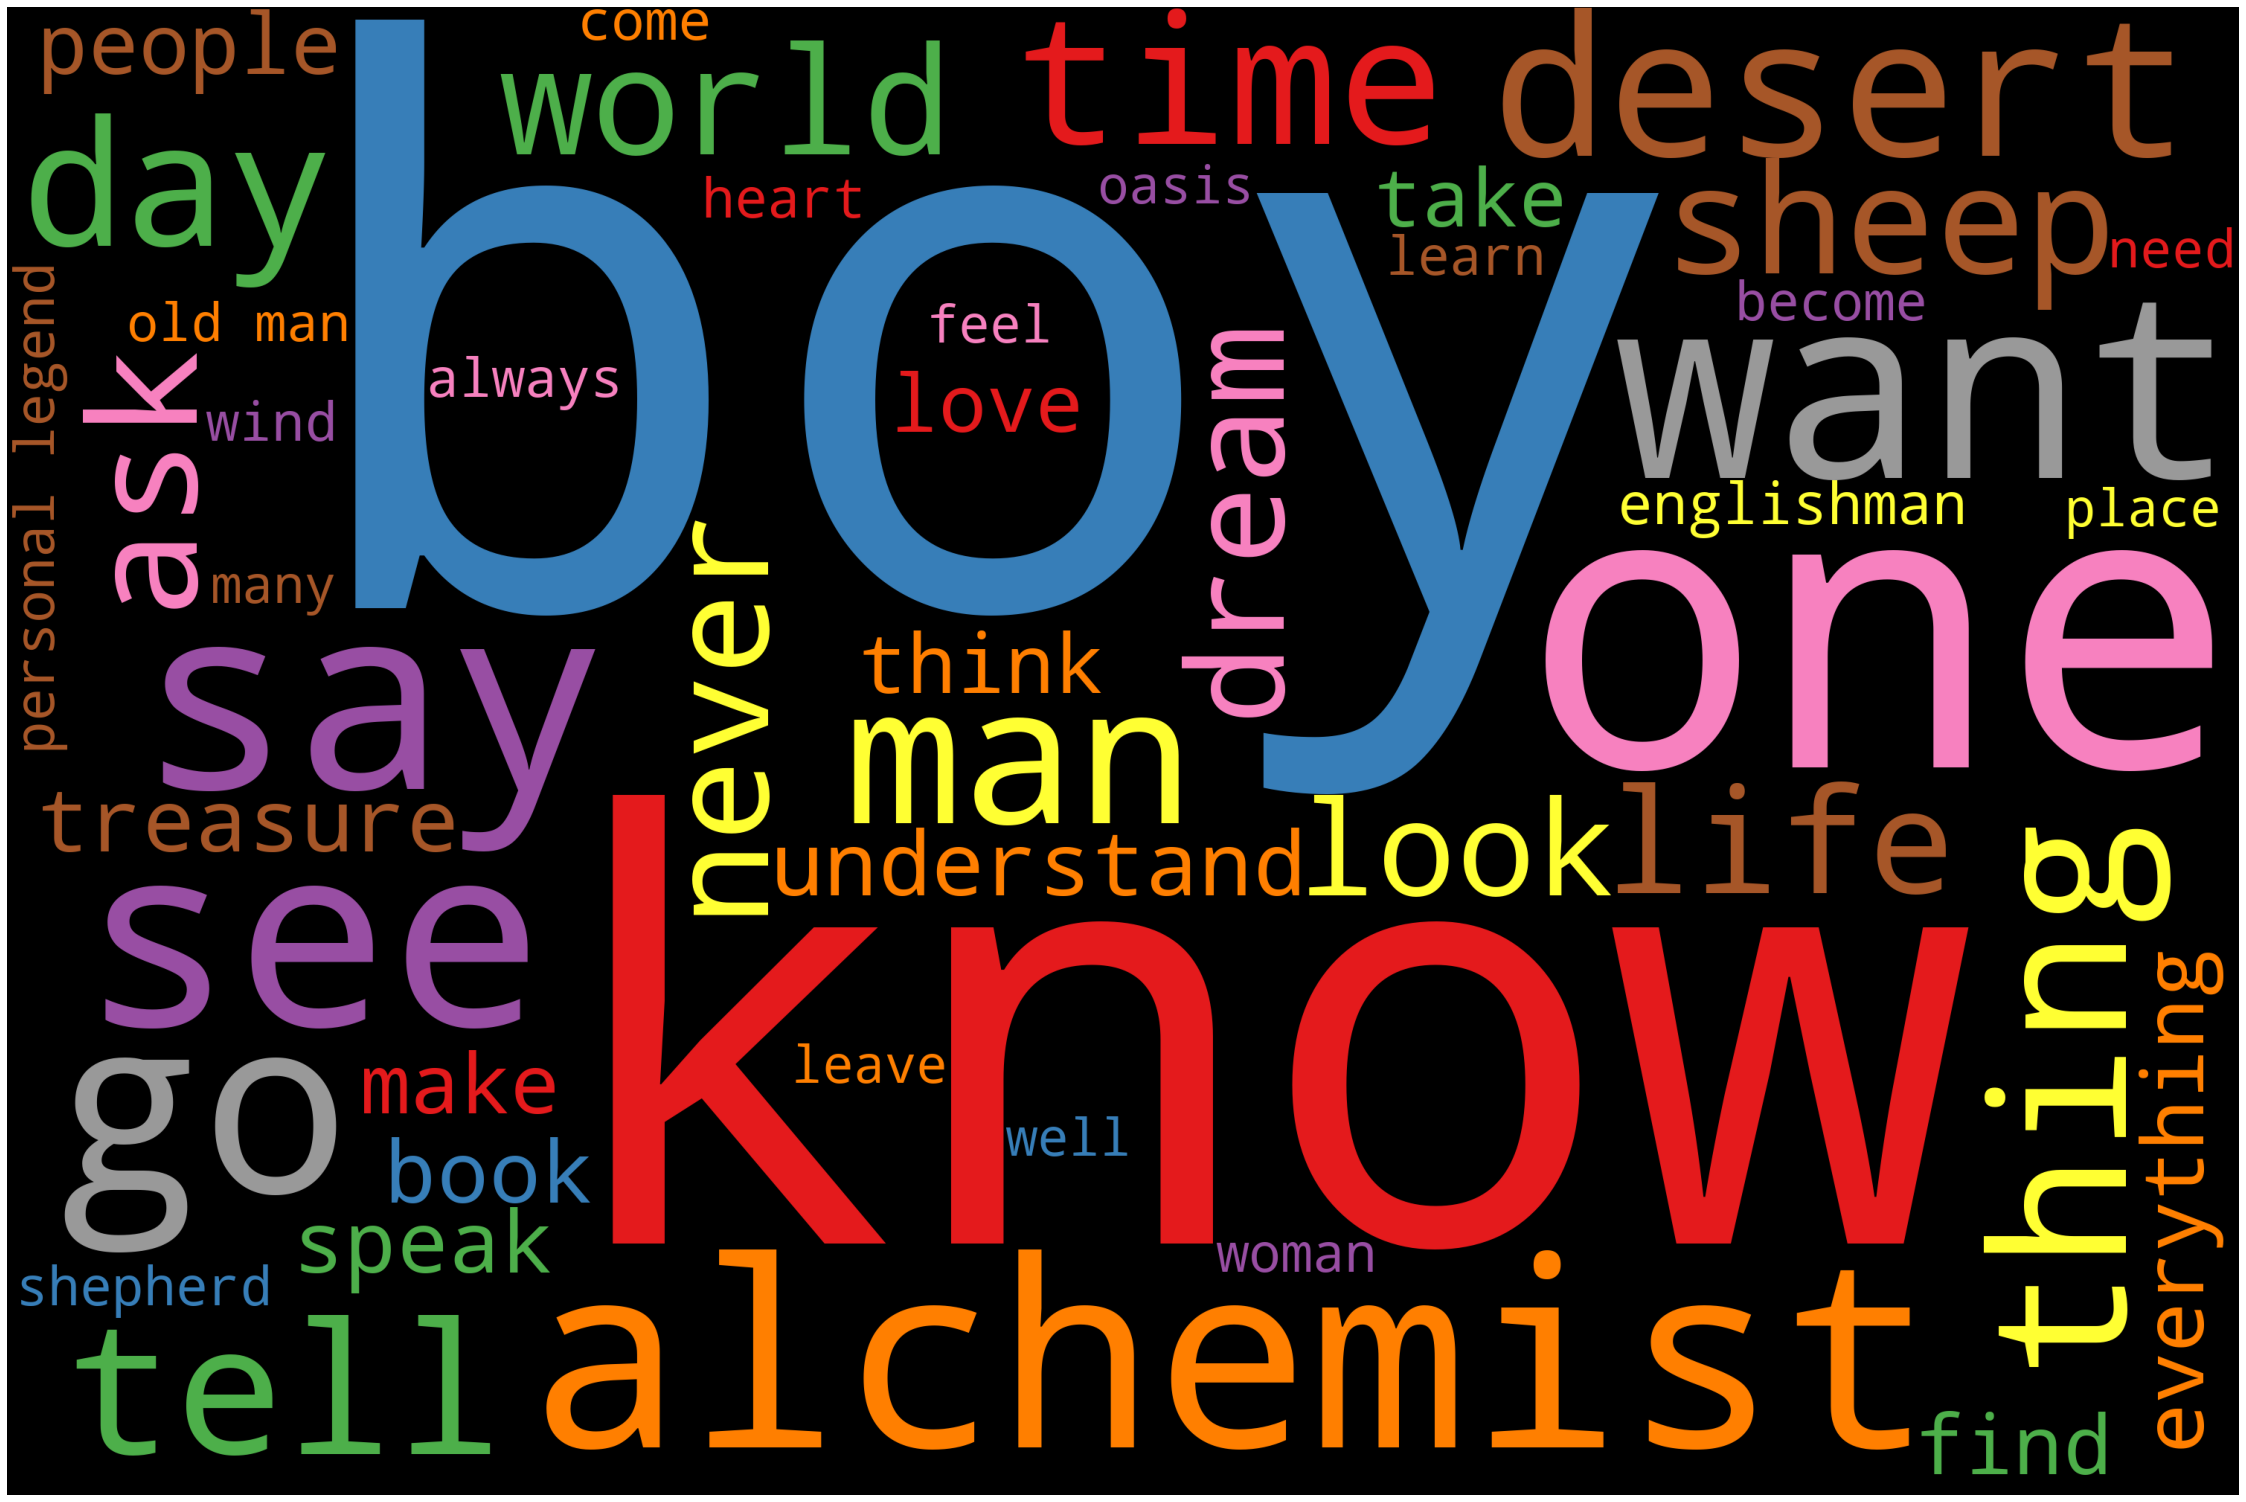

In [34]:
# Define a function to plot word cloud
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):        
    plt.figure(figsize = (40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black', max_words = 50,
                   colormap = 'Set1', stopwords = STOPWORDS).generate(clean_Book)
plot_cloud(wordcloud)

##  Named Entity Recognition (NER)

In [35]:
# Parts Of Speech (POS) Tagging
nlp = spacy.load('en_core_web_sm')      

one_block = clean_Book
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style = 'ent', jupyter = True)

In [36]:
for token in doc_block[100:200]:
    print(token,token.pos_) 

phone NOUN
say VERB
president PROPN
clinton PROPN
roberts PROPN
declare PROPN
adore NOUN
book NOUN
walk VERB
alone ADJ
the DET
alchemist NOUN
" PUNCT
what PRON
' PUNCT
secret NOUN
behind ADP
huge ADJ
success NOUN
god PROPN
choose VERB
earth NOUN
whenever SCONJ
something PRON
' PART
courage NOUN
confront NOUN
dream NOUN
why SCONJ
there ADV
four NUM
obstacle NOUN
first ADV
tell VERB
childhood NOUN
onward ADV
everything PRON
want VERB
impossible ADJ
we PRON
grow VERB
call VERB
deeply ADV
bury ADJ
soul NOUN
invisible ADJ
but CCONJ
' PUNCT
still ADV
afraid ADJ
hurt VERB
around ADV
we PRON
abandon VERB
everything PRON
order NOUN
pursue VERB
dream NOUN
we PRON
realize VERB
love NOUN
we PRON
realize VERB
genuinely ADV
wish VERB
we PRON
well ADV
want VERB
we PRON
happy ADJ
prepare VERB
accompany NOUN
we PRON
journey VERB
third ADJ
obstacle NOUN
fear VERB
defeat NOUN
meet NOUN
' PUNCT
really ADV
want VERB
anyway ADV
" PUNCT
we PRON
want VERB
know AUX
stake VERB
everything PRON
path NOUN
personal

In [37]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['suffering', 'pass', 'suffer', 'bitterness', 'stay', 'rest', 'life', 'day', 'come', 'obstacle', 'fear', 'realize', 'dream', 'fight', 'life', 'oscar', 'wilde', 'say', 'man', 'kill', 'thing', 'love', 'possibility', 'get', 'want', 'fill', 'soul', 'person', 'guilt', 'look', 'fail', 'want', 'feel', 'deserve', 'get', 'want', 'forget', 'obstacle', 'series', 'mistake', 'reach', 'goal', 'step', 'obstacle', 'kind', 'aura', 'renounce', 'joy', 'understand', 'translate', 'alchemist', 'pick', 'book', 'lake', 'contemplate', 'beauty', 'call', 'author', 'end', 'story', 'transform', 'lake', 'tear', 'weep', 'goddess', 'ask', 'contemplate', 'beauty', 'hand', 'lake', 'ask', 'know', 'goddess', 'say', 'contemplate', 'part', 'boy', 's', 'name', 'dusk', 'fall', 'boy', 'arrive', 'herd', 'roof', 'fall', 'stand', 'decide', 'spend', 'night', 'see', 'prevent', 'flock', 'wander', 'night', 'search', 'finish', 'read', 'pillow', 'tell']


In [38]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis = 0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10] 

,word,count
0,boy,180
1,know,90
2,man,85
3,say,71
4,see,64
5,go,60
6,want,59
7,desert,58
8,world,56
9,ask,56


<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

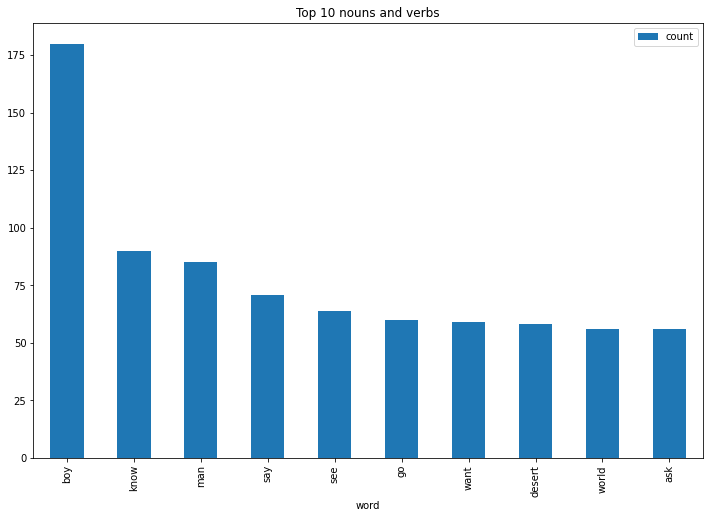

In [39]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x = 'word', figsize = (12,8), title = 'Top 10 nouns and verbs')

##  Summarization using spacy (Auto Trained Model)

In [40]:
import spacy
import en_core_web_sm
 
nlp = en_core_web_sm.load()

 
# Convert text into spacy formatted document
doc = nlp(Book_observations_text)
 
clean_token = []
for token in doc:
    if not (token.is_stop):
        clean_token.append(token.text)
         
print('Before:-------')
print(doc,'\n')

Before:-------
ALCHEMIST PAULO COELHO TRANSLATED BY ALAN R . CLARKE Contents INTRODUCTION I remember receiving a letter from the American publisher Harper Collins … PROLOGUE The alchemist picked up a book that someone in the … ONE The boy ’ s name was Santiago . Dusk was falling as the … TWO The boy had been working for the crystal merchant for … EPILOGUE church just as night … ABOUT THE AUTHOR INTERNATIONAL ACCLAIM BOOKS BY PAULO COELHO CREDITS COVER COPYRIGHT ABOUT THE PUBLISHER TEN YEARS ON I REMEMBER RECEIVING A LETTER FROM THE AMERICAN publisher Harper Collins that said that : “ reading The Alchemist was like getting up at dawn and seeing the sun rise while the rest of the world still slept . ” I struggling to establish myself as a writer and to follow my path despite all the voices telling me it was impossible . Brazilian journalist phoned to say that President Clinton had been Roberts declaring that she adored the book . Walking alone down a The Alchemist ! ” What ’ s the secret

In [41]:
# Join sentence without stop words 
print('After:-------')
' '.join(clean_token)

After:-------


'ALCHEMIST PAULO COELHO TRANSLATED ALAN R . CLARKE Contents INTRODUCTION remember receiving letter American publisher Harper Collins … PROLOGUE alchemist picked book … boy ’ s Santiago . Dusk falling … boy working crystal merchant … EPILOGUE church night … AUTHOR INTERNATIONAL ACCLAIM BOOKS PAULO COELHO CREDITS COVER COPYRIGHT PUBLISHER YEARS REMEMBER RECEIVING LETTER AMERICAN publisher Harper Collins said : “ reading Alchemist like getting dawn seeing sun rise rest world slept . ” struggling establish writer follow path despite voices telling impossible . Brazilian journalist phoned President Clinton Roberts declaring adored book . Walking Alchemist ! ” ’ s secret huge success ? God chose Earth . don ’ t courage confront dream . ? obstacles . : told childhood onward want impossible . grow calling deeply buried soul invisible . ’ s . afraid hurting abandoning order pursue dream . realize love realize genuinely wish want happy prepared accompany journey . obstacle : fear defeats meet di

In [42]:
Book_1 = ' '.join(clean_token)
Book_1

'ALCHEMIST PAULO COELHO TRANSLATED ALAN R . CLARKE Contents INTRODUCTION remember receiving letter American publisher Harper Collins … PROLOGUE alchemist picked book … boy ’ s Santiago . Dusk falling … boy working crystal merchant … EPILOGUE church night … AUTHOR INTERNATIONAL ACCLAIM BOOKS PAULO COELHO CREDITS COVER COPYRIGHT PUBLISHER YEARS REMEMBER RECEIVING LETTER AMERICAN publisher Harper Collins said : “ reading Alchemist like getting dawn seeing sun rise rest world slept . ” struggling establish writer follow path despite voices telling impossible . Brazilian journalist phoned President Clinton Roberts declaring adored book . Walking Alchemist ! ” ’ s secret huge success ? God chose Earth . don ’ t courage confront dream . ? obstacles . : told childhood onward want impossible . grow calling deeply buried soul invisible . ’ s . afraid hurting abandoning order pursue dream . realize love realize genuinely wish want happy prepared accompany journey . obstacle : fear defeats meet di

In [43]:
len(Book_1)

52189

#  Model Building


### 1)  LexRank Model

In [44]:
# Importing libraries
import sumy                               
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

In [45]:
# Fit our data to the model to summarized
parser = PlaintextParser.from_string(Book_1,Tokenizer('english'))
parser = PlaintextParser.from_string(Book_1,Tokenizer('english'))

In [46]:
parser

In [47]:
# Import Model
from sumy.summarizers.lex_rank import LexRankSummarizer   

In [48]:
summarizer = LexRankSummarizer()

In [49]:
summary = summarizer(parser.document,70)

In [50]:
for sentence in summary:
     print(sentence)

certain took bit longer awaken . . believed sheep able understand said .
going able save little money dream hidden treasure !
remembered number things care : went market bench plaza sample new wine boy knew lot people city .
’ s world ’ s greatest lie .
” boy asked .
“ ’ s like .
” ’ s books .
tell incredible stories time things strange don ’ t know continue conversation . ?
” boy didn ’ t know person ’ s “ Personal Legend ” .
boy reminded old man said hidden treasure .
sale sheep left man known talking : time boy path observing ground sky .
old man said ask clear asked old man ’ s blessing .
’ s ’ s thing old man — sense person near far Personal Legend .
eyes filled tears spoke wanted live life accordance Muslim law .
” boy asked .
don ’ t want life .
know things thought boy .
time thought sheep teach needed know world .
” old man said .
” asked boy .
knows … maybe ’ s better like crystal merchant : boy thought — came bar entered day tea . . maybe ’ ll chance entire desert Pyramids .


In [51]:
final_summary = " ".join(map(str, summary[0:]))    ## Join the scentences to make a continous summar
final_summary

'certain took bit longer awaken . . believed sheep able understand said . going able save little money dream hidden treasure ! remembered number things care : went market bench plaza sample new wine boy knew lot people city . ’ s world ’ s greatest lie . ” boy asked . “ ’ s like . ” ’ s books . tell incredible stories time things strange don ’ t know continue conversation . ? ” boy didn ’ t know person ’ s “ Personal Legend ” . boy reminded old man said hidden treasure . sale sheep left man known talking : time boy path observing ground sky . old man said ask clear asked old man ’ s blessing . ’ s ’ s thing old man — sense person near far Personal Legend . eyes filled tears spoke wanted live life accordance Muslim law . ” boy asked . don ’ t want life . know things thought boy . time thought sheep teach needed know world . ” old man said . ” asked boy . knows … maybe ’ s better like crystal merchant : boy thought — came bar entered day tea . . maybe ’ ll chance entire desert Pyramids .

In [52]:
# Remove punctuations mark from the summary
translate_table = dict((ord(char), None) for char in string.punctuation)   
final_summary_1 = final_summary.translate(translate_table)
final_summary_1

'certain took bit longer awaken   believed sheep able understand said  going able save little money dream hidden treasure  remembered number things care  went market bench plaza sample new wine boy knew lot people city  ’ s world ’ s greatest lie  ” boy asked  “ ’ s like  ” ’ s books  tell incredible stories time things strange don ’ t know continue conversation   ” boy didn ’ t know person ’ s “ Personal Legend ”  boy reminded old man said hidden treasure  sale sheep left man known talking  time boy path observing ground sky  old man said ask clear asked old man ’ s blessing  ’ s ’ s thing old man — sense person near far Personal Legend  eyes filled tears spoke wanted live life accordance Muslim law  ” boy asked  don ’ t want life  know things thought boy  time thought sheep teach needed know world  ” old man said  ” asked boy  knows … maybe ’ s better like crystal merchant  boy thought — came bar entered day tea   maybe ’ ll chance entire desert Pyramids  felt didn ’ t want look like

In [53]:
len(final_summary_1),len(Book_1)

(2466, 52189)

In [54]:
# Model Evaluation
from rouge import Rouge      
rouge = Rouge()

In [55]:
rouge.get_scores(final_summary_1, Book_1)

[{'rouge-1': {'r': 0.08483754512635379, 'p': 1.0, 'f': 0.1564059885748932},
  'rouge-2': {'r': 0.04556999850590169,
   'p': 0.8815028901734104,
   'f': 0.08666003600229444},
  'rouge-l': {'r': 0.08483754512635379, 'p': 1.0, 'f': 0.1564059885748932}}]

### 2) Luhn Summarizer

In [56]:
# Importing Library
from sumy.summarizers.luhn import LuhnSummarizer    
luhn_summarizer = LuhnSummarizer()

In [57]:
# Model Building
summary_1 = luhn_summarizer(parser.document,20)  

In [58]:
for sentence in summary_1:
    print(sentence)

ALCHEMIST PAULO COELHO TRANSLATED ALAN R . CLARKE Contents INTRODUCTION remember receiving letter American publisher Harper Collins … PROLOGUE alchemist picked book … boy ’ s Santiago .
Dusk falling … boy working crystal merchant … EPILOGUE church night … AUTHOR INTERNATIONAL ACCLAIM BOOKS PAULO COELHO CREDITS COVER COPYRIGHT PUBLISHER YEARS REMEMBER RECEIVING LETTER AMERICAN publisher Harper Collins said : “ reading Alchemist like getting dawn seeing sun rise rest world slept .
world huge inexhaustible ; allow sheep set route don ’ t realize ’ walking new road day .
remembered number things care : went market bench plaza sample new wine boy knew lot people city .
“ Don ’ t forget deal thing don ’ t forget follow Personal Legend conclusion .
sale sheep left man known talking : time boy path observing ground sky .
boy trying understand truth old man stones proof met king — king knew boy ’ s past .
“ candy merchant isn ’ t making candy later travel marry shopkeeper ’ s daughter .
’ s ’ s

In [59]:
# Joining the sentences
final_summary2 = " ".join(map(str, summary_1[0:]))  
final_summary2

'ALCHEMIST PAULO COELHO TRANSLATED ALAN R . CLARKE Contents INTRODUCTION remember receiving letter American publisher Harper Collins … PROLOGUE alchemist picked book … boy ’ s Santiago . Dusk falling … boy working crystal merchant … EPILOGUE church night … AUTHOR INTERNATIONAL ACCLAIM BOOKS PAULO COELHO CREDITS COVER COPYRIGHT PUBLISHER YEARS REMEMBER RECEIVING LETTER AMERICAN publisher Harper Collins said : “ reading Alchemist like getting dawn seeing sun rise rest world slept . world huge inexhaustible ; allow sheep set route don ’ t realize ’ walking new road day . remembered number things care : went market bench plaza sample new wine boy knew lot people city . “ Don ’ t forget deal thing don ’ t forget follow Personal Legend conclusion . sale sheep left man known talking : time boy path observing ground sky . boy trying understand truth old man stones proof met king — king knew boy ’ s past . “ candy merchant isn ’ t making candy later travel marry shopkeeper ’ s daughter . ’ s ’ 

In [60]:
# Remove punctuations mark from the summary
translate_table = dict((ord(char), None) for char in string.punctuation)   
final_summary_2 = final_summary2.translate(translate_table)
final_summary_2

'ALCHEMIST PAULO COELHO TRANSLATED ALAN R  CLARKE Contents INTRODUCTION remember receiving letter American publisher Harper Collins … PROLOGUE alchemist picked book … boy ’ s Santiago  Dusk falling … boy working crystal merchant … EPILOGUE church night … AUTHOR INTERNATIONAL ACCLAIM BOOKS PAULO COELHO CREDITS COVER COPYRIGHT PUBLISHER YEARS REMEMBER RECEIVING LETTER AMERICAN publisher Harper Collins said  “ reading Alchemist like getting dawn seeing sun rise rest world slept  world huge inexhaustible  allow sheep set route don ’ t realize ’ walking new road day  remembered number things care  went market bench plaza sample new wine boy knew lot people city  “ Don ’ t forget deal thing don ’ t forget follow Personal Legend conclusion  sale sheep left man known talking  time boy path observing ground sky  boy trying understand truth old man stones proof met king — king knew boy ’ s past  “ candy merchant isn ’ t making candy later travel marry shopkeeper ’ s daughter  ’ s ’ s thing old m

In [61]:
len(final_summary_2),len(Book_1)

(2310, 52189)

In [62]:
rouge.get_scores(final_summary_2, Book_1) 

[{'rouge-1': {'r': 0.11191335740072202, 'p': 1.0, 'f': 0.20129869948832013},
  'rouge-2': {'r': 0.04676527715523682,
   'p': 0.9152046783625731,
   'f': 0.08898365223774275},
  'rouge-l': {'r': 0.11191335740072202, 'p': 1.0, 'f': 0.20129869948832013}}]

### 3) LSA Summarizer

In [63]:
# Importing Library
from sumy.summarizers.lsa import LsaSummarizer   
lsa_summarizer = LsaSummarizer()

In [64]:
# Model Building
lsa_summary = lsa_summarizer(parser.document,25)    

In [65]:
for sentence in lsa_summary:
    print(sentence)

Dusk falling … boy working crystal merchant … EPILOGUE church night … AUTHOR INTERNATIONAL ACCLAIM BOOKS PAULO COELHO CREDITS COVER COPYRIGHT PUBLISHER YEARS REMEMBER RECEIVING LETTER AMERICAN publisher Harper Collins said : “ reading Alchemist like getting dawn seeing sun rise rest world slept .
world huge inexhaustible ; allow sheep set route don ’ t realize ’ walking new road day .
’ s possibility having dream come true makes life old woman interpreted dreams .
remembered number things care : went market bench plaza sample new wine boy knew lot people city .
” old man — maybe husband — going find way money exchange information bright reflected chest intensity boy momentarily blinded .
Melchizedek watched small ship plowing way seen Abraham having charged - tenth fee .
sale sheep left man known talking : time boy path observing ground sky .
Creatures like probably wasn ’ t . excited intuitive understanding camel driver ’ s comment : maybe learning universal language deals past boy be

In [66]:
final_summary3 = " ".join(map(str, lsa_summary[0:]))

In [67]:
final_summary3

'Dusk falling … boy working crystal merchant … EPILOGUE church night … AUTHOR INTERNATIONAL ACCLAIM BOOKS PAULO COELHO CREDITS COVER COPYRIGHT PUBLISHER YEARS REMEMBER RECEIVING LETTER AMERICAN publisher Harper Collins said : “ reading Alchemist like getting dawn seeing sun rise rest world slept . world huge inexhaustible ; allow sheep set route don ’ t realize ’ walking new road day . ’ s possibility having dream come true makes life old woman interpreted dreams . remembered number things care : went market bench plaza sample new wine boy knew lot people city . ” old man — maybe husband — going find way money exchange information bright reflected chest intensity boy momentarily blinded . Melchizedek watched small ship plowing way seen Abraham having charged - tenth fee . sale sheep left man known talking : time boy path observing ground sky . Creatures like probably wasn ’ t . excited intuitive understanding camel driver ’ s comment : maybe learning universal language deals past boy b

In [68]:
# Remove punctuations mark from the summary
import string
translate_table = dict((ord(char), None) for char in string.punctuation)   
final_summary_3 = final_summary3.translate(translate_table)
final_summary_3

'Dusk falling … boy working crystal merchant … EPILOGUE church night … AUTHOR INTERNATIONAL ACCLAIM BOOKS PAULO COELHO CREDITS COVER COPYRIGHT PUBLISHER YEARS REMEMBER RECEIVING LETTER AMERICAN publisher Harper Collins said  “ reading Alchemist like getting dawn seeing sun rise rest world slept  world huge inexhaustible  allow sheep set route don ’ t realize ’ walking new road day  ’ s possibility having dream come true makes life old woman interpreted dreams  remembered number things care  went market bench plaza sample new wine boy knew lot people city  ” old man — maybe husband — going find way money exchange information bright reflected chest intensity boy momentarily blinded  Melchizedek watched small ship plowing way seen Abraham having charged  tenth fee  sale sheep left man known talking  time boy path observing ground sky  Creatures like probably wasn ’ t  excited intuitive understanding camel driver ’ s comment  maybe learning universal language deals past boy beginning under

In [69]:
# Model Evaluation
rouge.get_scores(final_summary_3, Book_1)   

[{'rouge-1': {'r': 0.15117328519855597, 'p': 1.0, 'f': 0.2626420988552925},
  'rouge-2': {'r': 0.05871806364858808,
   'p': 0.9097222222222222,
   'f': 0.1103157883345764},
  'rouge-l': {'r': 0.15117328519855597, 'p': 1.0, 'f': 0.2626420988552925}}]

### 4) Text Rank


In [70]:
# Importing Library
from sumy.summarizers.text_rank import TextRankSummarizer  
text_summary = TextRankSummarizer()

In [71]:
# Model Building
summary_result = text_summary(parser.document,20)   

In [72]:
for sentence in summary_result:
    print(sentence)

Dusk falling … boy working crystal merchant … EPILOGUE church night … AUTHOR INTERNATIONAL ACCLAIM BOOKS PAULO COELHO CREDITS COVER COPYRIGHT PUBLISHER YEARS REMEMBER RECEIVING LETTER AMERICAN publisher Harper Collins said : “ reading Alchemist like getting dawn seeing sun rise rest world slept .
” boy didn ’ t know person ’ s “ Personal Legend ” .
boy trying understand truth old man stones proof met king — king knew boy ’ s past .
old man said ask clear asked old man ’ s blessing .
’ s ’ s thing old man — sense person near far Personal Legend .
world fallen silent boy ’ s moment .
boy ’ s having hired boy .
knows … maybe ’ s better like crystal merchant : boy thought — came bar entered day tea . . maybe ’ ll chance entire desert Pyramids .
boy knew boy .
Creatures like probably wasn ’ t . excited intuitive understanding camel driver ’ s comment : maybe learning universal language deals past boy beginning understand intuition sudden covered salt dried - lakes .
Englishman didn ’ t want

In [73]:
textrank_final = " ".join(map(str, summary_result[0:]))
textrank_final

'Dusk falling … boy working crystal merchant … EPILOGUE church night … AUTHOR INTERNATIONAL ACCLAIM BOOKS PAULO COELHO CREDITS COVER COPYRIGHT PUBLISHER YEARS REMEMBER RECEIVING LETTER AMERICAN publisher Harper Collins said : “ reading Alchemist like getting dawn seeing sun rise rest world slept . ” boy didn ’ t know person ’ s “ Personal Legend ” . boy trying understand truth old man stones proof met king — king knew boy ’ s past . old man said ask clear asked old man ’ s blessing . ’ s ’ s thing old man — sense person near far Personal Legend . world fallen silent boy ’ s moment . boy ’ s having hired boy . knows … maybe ’ s better like crystal merchant : boy thought — came bar entered day tea . . maybe ’ ll chance entire desert Pyramids . boy knew boy . Creatures like probably wasn ’ t . excited intuitive understanding camel driver ’ s comment : maybe learning universal language deals past boy beginning understand intuition sudden covered salt dried - lakes . Englishman didn ’ t wan

In [74]:
# Removing punctuations marks from summary
import string
translate_table = dict((ord(char), None) for char in string.punctuation)  
TextRank_Summary = textrank_final.translate(translate_table)
TextRank_Summary

'Dusk falling … boy working crystal merchant … EPILOGUE church night … AUTHOR INTERNATIONAL ACCLAIM BOOKS PAULO COELHO CREDITS COVER COPYRIGHT PUBLISHER YEARS REMEMBER RECEIVING LETTER AMERICAN publisher Harper Collins said  “ reading Alchemist like getting dawn seeing sun rise rest world slept  ” boy didn ’ t know person ’ s “ Personal Legend ”  boy trying understand truth old man stones proof met king — king knew boy ’ s past  old man said ask clear asked old man ’ s blessing  ’ s ’ s thing old man — sense person near far Personal Legend  world fallen silent boy ’ s moment  boy ’ s having hired boy  knows … maybe ’ s better like crystal merchant  boy thought — came bar entered day tea   maybe ’ ll chance entire desert Pyramids  boy knew boy  Creatures like probably wasn ’ t  excited intuitive understanding camel driver ’ s comment  maybe learning universal language deals past boy beginning understand intuition sudden covered salt dried  lakes  Englishman didn ’ t want tell reasons bo

In [75]:
# Model Evaluation
rouge.get_scores(TextRank_Summary, Book_1)    

[{'rouge-1': {'r': 0.06859205776173286, 'p': 1.0, 'f': 0.12837837717699965},
  'rouge-2': {'r': 0.03047960555804572,
   'p': 0.9147982062780269,
   'f': 0.058993637316918535},
  'rouge-l': {'r': 0.06859205776173286, 'p': 1.0, 'f': 0.12837837717699965}}]

### 5) Bart Model

In [76]:
# Importing the model
from transformers import BartForConditionalGeneration, BartTokenizer, BartConfig

In [77]:
# Model Building
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')   
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

In [78]:
Book_2 = Book[0:30]
Book_2

['ALCHEMIST',
 'PAULO COELHO',
 'TRANSLATED BY ALAN R. CLARKE',
 'Contents',
 'INTRODUCTION',
 'I remember receiving a letter from the',
 'American publisher Harper Collins…',
 'PROLOGUE',
 'The alchemist picked up a book that someone',
 'in the…',
 'ONE',
 'The boy’s name was Santiago. Dusk was',
 'falling as the…',
 'TWO',
 'The boy had been working for the crystal',
 'merchant for…',
 'EPILOGUE',
 'church just as night…',
 'ABOUT THE AUTHOR',
 'INTERNATIONAL ACCLAIM',
 'BOOKS BY PAULO COELHO',
 'CREDITS',
 'COVER',
 'COPYRIGHT',
 'ABOUT THE PUBLISHER',
 'TEN YEARS ON',
 'I REMEMBER RECEIVING A LETTER FROM THE AMERICAN publisher Harper',
 'Collins that said that: “reading The Alchemist was like getting up at',
 'dawn and seeing the sun rise while the rest of the world still slept.” I',
 'struggling to establish myself as a writer and to follow my path']

In [79]:
Book_3 = ' '.join(Book_2)
Book_3

'ALCHEMIST PAULO COELHO TRANSLATED BY ALAN R. CLARKE Contents INTRODUCTION I remember receiving a letter from the American publisher Harper Collins… PROLOGUE The alchemist picked up a book that someone in the… ONE The boy’s name was Santiago. Dusk was falling as the… TWO The boy had been working for the crystal merchant for… EPILOGUE church just as night… ABOUT THE AUTHOR INTERNATIONAL ACCLAIM BOOKS BY PAULO COELHO CREDITS COVER COPYRIGHT ABOUT THE PUBLISHER TEN YEARS ON I REMEMBER RECEIVING A LETTER FROM THE AMERICAN publisher Harper Collins that said that: “reading The Alchemist was like getting up at dawn and seeing the sun rise while the rest of the world still slept.” I struggling to establish myself as a writer and to follow my path'

In [80]:
# Encoding the inputs and passing them to model.generate()
inputs = tokenizer.batch_encode_plus([Book_3],return_tensors='pt')
summary_ids = model.generate(inputs['input_ids'], early_stopping=True)

In [81]:
# Decoding and printing the summary
bart_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(bart_summary)

The Alchemist by Paulo Coelho is written in Spanish and translated by Alan Clarke. The book is about an alchemist who discovers the secrets of the alchemical process. The Alchemist is published by Harper Collins and is published in the UK by Hodder & Stoughton at £16.99.


In [82]:
rouge.get_scores(bart_summary, Book_3)   

[{'rouge-1': {'r': 0.1111111111111111,
   'p': 0.3235294117647059,
   'f': 0.16541353002883155},
  'rouge-2': {'r': 0.024390243902439025,
   'p': 0.06666666666666667,
   'f': 0.03571428179209227},
  'rouge-l': {'r': 0.09090909090909091,
   'p': 0.2647058823529412,
   'f': 0.1353383420589068}}]

# Evaluation Table 


In [83]:
#create table
table = [["Recall", 0.08484,0.11191,0.15117,0.06859,0.09090], 
        ["Prescion", 1.0,1.0,1.0,1.0,0.2647], 
        ["F-score", 0.1564,0.2012,0.2626,0.1283,0.1353]] 
        

#define column names
col = ["score", "Lexrank","Luhn","LSA","Textrank","BART"]

#display table
from tabulate import tabulate
print(tabulate(table, headers=col, tablefmt="grid"))

+----------+-----------+---------+---------+------------+--------+
| score    |   Lexrank |    Luhn |     LSA |   Textrank |   BART |
+==========+===========+=========+=========+============+========+
| Recall   |   0.08484 | 0.11191 | 0.15117 |    0.06859 | 0.0909 |
+----------+-----------+---------+---------+------------+--------+
| Prescion |   1       | 1       | 1       |    1       | 0.2647 |
+----------+-----------+---------+---------+------------+--------+
| F-score  |   0.1564  | 0.2012  | 0.2626  |    0.1283  | 0.1353 |
+----------+-----------+---------+---------+------------+--------+
